# <center>Computational Systems Biology, Final Exam
<center>王宇哲 2201112023
<center>Academy for Advanced Interdisciplinary Studies, Peking University

## 1. 米氏酶动力学 (Michalis-Menten Kinetics)

根据以下反应机理，变构酶$E$与底物$S$反应生成产物P：
$$
\begin{aligned}
S + E & \xrightleftharpoons[k_{-1}]{k_{1}} C_1\xrightarrow{k_2} E+P \\
S + C_1 & \xrightleftharpoons[k_{-3}]{k_{3}} C_2\xrightarrow{k_4} C_1+P \\
\end{aligned}\tag{1}
$$
其中$k$是速率常数并且$C_1$和$C_2$是酶-底物复合物。用小写字母表示浓度，初始条件为$s(0)=s_0,\, e(0)=e_0,\,C_1(0)=C_2(0)=0$, 请根据质量作用定律写出微分方程模型。

***Proof.*** 根据质量作用定律，微分方程模型为：
$$
\begin{aligned}
\frac{ds}{dt} &= -k_1se+k_{-1}c_1-k_3sc_1+k_{-3}c_2 \\
\frac{de}{dt} &= -k_1se+k_{-1}c_1+k_2c_1 \\
\frac{dc_1}{dt} &=  k_1se-k_{-1}c_1-k_2c_1-k_3sc_1+k_{-3}c_2+k_4c_2\\
\frac{dc_2}{dt} &=  k_3sc_1-k_{-3}c_2-k_4c_2\\
\frac{dp}{dt} &=  k_2c_1+k_4c_2\\
\end{aligned}\tag{2}
$$

如果
$$
\begin{aligned}
&\varepsilon=\frac{e_0}{s_0}\ll 1\\
&\tau=k_1e_0t\\
&u=\frac{s}{s_0}\\ 
&v_i=\frac{c_i}{e_0}
\end{aligned}\tag{3}
$$
无量纲化后的反应方程为如下形式：
$$
\begin{aligned}
\frac{du}{d\tau}&=f(u,v_1,v_2) \\
\varepsilon\frac{dv_i}{d\tau}&=g_i(u,v_1,v_2),\,i=1,2 \\
\end{aligned}\tag{4}
$$
请写出$f,g_1,g_2$的具体形式，并且推到当$\tau\gg\varepsilon$时，$u$的变化由以下方程所决定：
$$
\frac{du}{d\tau}=-r(u)=-u\frac{A+Bu}{C+u+Du^2}\tag{5}
$$
其中$A,B,C,D$是正参数。

***Proof.*** 对(2)式进行无量纲化，考虑
$$
e_0=e+c_1+c_2\tag{6}
$$
得到
$$
\begin{aligned}
\frac{du}{d\tau}&=-u+\Big(u-\frac{k_3}{k_1}u+\frac{k_{-1}}{k_1s_0}\Big)v_1+\Big(u+\frac{k_{-3}}{k_1s_0}\Big)v_2\\
\varepsilon\frac{dv_1}{d\tau}&=u-\Big(u+\frac{k_3}{k_1}u+\frac{k_{-1}+k_2}{k_1s_0}\Big)v_1-\Big(u-\frac{k_{-3}+k_4}{k_1s_0}\Big)v_2\\
\varepsilon\frac{dv_2}{d\tau}&=\frac{k_3}{k_1}uv_1-\frac{k_{-3}+k_4}{k_1s_0}v_2\\
\end{aligned}\tag{7}
$$
也即
$$
\begin{aligned}
f(u,v_1,v_2)&=-u+\Big(u-\frac{k_3}{k_1}u+\frac{k_{-1}}{k_1s_0}\Big)v_1+\Big(u+\frac{k_{-3}}{k_1s_0}\Big)v_2\\
g_1(u,v_1,v_2)&=u-\Big(u+\frac{k_3}{k_1}u+\frac{k_{-1}+k_2}{k_1s_0}\Big)v_1-\Big(u-\frac{k_{-3}+k_4}{k_1s_0}\Big)v_2\\
g_2(u,v_1,v_2)&=\frac{k_3}{k_1}uv_1-\frac{k_{-3}+k_4}{k_1s_0}v_2\\
\end{aligned}\tag{8}
$$
当$\tau\gg \varepsilon$时，可以认为
$$
\begin{aligned}
g_1(u,v_1,v_2)&=0\\
g_2(u,v_1,v_2)&=0\\
\end{aligned}\tag{9}
$$
故
$$
\begin{aligned}
\frac{du}{d\tau}&=-\frac{k_2}{k_1s_0}v_1-\frac{k_4}{k_1s_0}v_2\\
&=-\Big(\frac{k_3k_4}{k_1(k_{-3}+k_4)}u+\frac{k_2}{k_1s_0}\Big)v_1\\
&=-u\frac{\frac{k_2}{k_1s_0}+\frac{k_3k_4}{k_1(k_{-3}+k_4)}u}{\frac{k_{-1}+k_2}{k_1s_0}+u+\frac{k_3s_0}{k_{-3}+k_4}u^2}\\
&\equiv -u\frac{A+Bu}{C+u+Du^2}\\
&\equiv -r(u)\\
\end{aligned}\tag{10}
$$
其中$A,B.C,D$为正常数，即得到(5)式。

当$k_2=0$时，画出反应速率$r(u)$作为$u$的函数的草图，并且将其与Michaelis-Menten速率进行比较。

***Proof.*** 当$k_2=0$时，反应速率
$$
r(u)=\frac{Bu^2}{C+u+Du^2}\tag{11}
$$
使用如下Python代码画出$r(u)$的草图如下，并画出典型的Michaelis-Menten速率作为比较。可见$r(u)$具有S型曲线的形式。

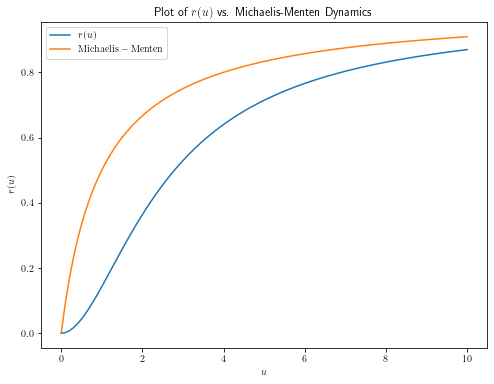

In [23]:
import numpy as np
import matplotlib.pyplot as plt

B = 1
C = 5
D = 1

def r(u, B=B, C=C, D=D):
    return (B * u**2) / (C + u + D * u**2)

def MM(u, K=1, V=1):
    return (V * u) / (K + u)


u_values = np.linspace(0, 10, 100)
r_values = r(u_values)
MM_values = MM(u_values)

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
    })


ax.plot(u_values, r_values, label='$r(u)$')
ax.plot(u_values, MM_values, label='$\\rm Michaelis-Menten$')
ax.set_xlabel('$u$')
ax.set_ylabel('$r(u)$')
ax.set_title('Plot of $r(u)$ vs. Michaelis-Menten Dynamics')
plt.legend()

fig.set_size_inches(8, 6)
plt.savefig('1.jpg', dpi=1000, bbox_inches='tight')
plt.show()

## 2. 自抑制中的振荡 (Oscillation in Self-Inhibition)

假设一种蛋白质抑制其自身的表达，使得描述蛋白质浓度$p$的微分方程为:
$$
\dot{p}=\frac{\alpha}{1+p^n}-p\tag{12}
$$
在什么参数范围内，这种自我抑制会导致振荡？平衡点是稳定的还是不稳定的？


***Proof.*** 平衡点$p_0$满足
$$
\frac{\alpha}{1+p_0^n}-p_0=0\tag{13}
$$
令$\dot{p}=f(p)$，计算
$$
f'(p_0)=-\frac{n\alpha p_0^{n-1}}{(1+p_0^n)^2}-1=-\frac{np_0^{n+1}}{\alpha}-1<0\tag{14}
$$
因此这种自我抑制不可能产生振荡，平衡点是稳定平衡点。

a. 现在考虑一个稍微复杂一点的模型，我们直接用它来模拟转录:
$$
\begin{aligned}
\dot{m}&=\frac{\alpha}{1+p^n}-m\\
\dot{p}&=-\beta(p-m)
\end{aligned}\tag{15}
$$
这组方程的不动点是什么？

***Proof.*** 方程(15)的平衡点$(m_0,p_0)$满足
$$
\begin{aligned}
\frac{\alpha}{1+p_0^n}-m_0&=0\\
-\beta(p_0-m_0)&=0\\
\end{aligned}\tag{16}
$$
也即
$$
m_0=p_0=\frac{\alpha}{1+p_0^n}\tag{17}
$$

b. 使用线性稳定性分析来计算使得这个平衡点变得不稳定，产生振荡的条件（如果有的话）。

***Proof.*** 计算(15)的Jacobian矩阵
$$
J=\begin{bmatrix}
-1 &-\frac{n\alpha p^{n-1}}{(1+p^n)^2}\\
\beta&-\beta\\
\end{bmatrix}\tag{18}
$$
因此
$$
\begin{aligned}
\text{Tr}(J)&=-1-\beta<0\\
\det(J)&=\beta+\beta\frac{n\alpha p^{n-1}}{(1+p^n)^2}>0\\
\end{aligned}\tag{19}
$$
因此平衡点$(m_0,p_0)$为稳定平衡点，无法产生振荡。

c. 如何修改这个模型以增强产生振荡的能力？

***Proof.*** 为产生振荡，需要修改模型使得蛋白质$p$促进自身的表达，即
$$
\begin{aligned}
\dot{m}&=\frac{\alpha}{1+p^n}-m\\
\dot{p}&=-\beta (p-m)+\gamma p^2
\end{aligned}\tag{20}
$$
修改后(20)的Jacobian矩阵为
$$
J'=\begin{bmatrix}
-1 &-\frac{n\alpha p^{n-1}}{(1+p^n)^2}\\
\beta&-\beta+2\gamma p\\
\end{bmatrix}\tag{21}
$$
考虑平衡点为$(m_0,p_0)$，当参数$n,\gamma,\beta$满足
$$
\text{Tr}(J')=-1-\beta+2\gamma p_0>0\tag{22}
$$
或
$$
\det(J')=\beta+\beta\frac{n\alpha p^{n-1}}{(1+p^n)^2}-2\gamma p_0<0\tag{23}
$$
时，模型可能产生振荡。

## 3. 主方程 (Master Equation)

考虑以下的负自调控模型
$$
\dot{n}=\frac{\beta K}{K+n}-\alpha n\tag{24}
$$
其中$n$是细胞中蛋白质的数量，$K$是启动子处于半数被抑制时候蛋白质的数量。

a. 使用主方程的形式，写出有$n$个蛋白质的概率随时间变化的表达式。

***Proof.*** 根据(24)，记
$$
\begin{aligned}
f_n&=\frac{\beta K}{K+n}\\
g_n&=\alpha n\\
\end{aligned}\tag{25}
$$
主方程给出有$n$个蛋白质的概率$P_n$随时间变化的表达式为
$$
\begin{aligned}
\frac{dP_n}{dt}&=-(f_n+g_n)P_n+f_{n-1}P_{n-1}+g_{n+1}P_{n+1}\\
&=-\Big(\frac{\beta K}{K+n}+\alpha n\Big)P_n+\frac{\beta K}{K+n-1}P_{n-1}+\alpha(n+1)P_{n+1}\\
\end{aligned}\tag{26}
$$

b. 假设$\beta= 1\,{\rm min^{-1}}$，$\alpha=0.1\,{\rm min^{-1}}$，$K=10$。如果在时间$t=0$时，细胞的初始状态为$P(n=20)=0.5$，$P(n=21)=0.5$，那么在$\Delta t =0.01\,{\rm min}$后状态的概率分布是什么？保持所有项与$\Delta t$同阶。

***Proof.*** 各参数代入(26)得
$$
\begin{aligned}
\frac{dP_n}{dt}&=-\Big(\frac{10}{10+n}+0.1n\Big)P_n+\frac{10}{9+n}P_{n-1}+0.1(n+1)P_{n+1}\\
\end{aligned}\tag{27}
$$
使用如下Python代码模拟概率分布随时间的演化，得到$\Delta t=0.01\,{\rm min}$后状态的概率分布，方便起见仅展示$n=17\sim 24$。

P_17 = 0.00000
P_18 = 0.00009
P_19 = 0.00987
P_20 = 0.49876
P_21 = 0.48970
P_22 = 0.00157
P_23 = 0.00000
P_24 = 0.00000
P_25 = 0.00000


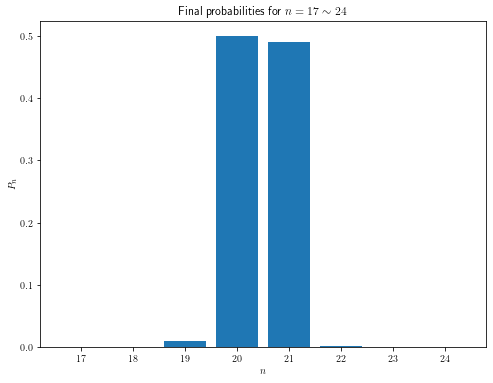

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 41  # number of states
T = 0.01  # total time
dt = 0.00001  # time step
steps = int(T / dt)  # number of steps

# Initialize the probabilities
P = np.zeros(N)
P[20] = 0.5
P[21] = 0.5

# Define the rates
def rates(n):
    return 10 / (9 + n), -((10 / (10 + n)) + 0.1 * n), 0.1 * (n + 1)

# Time evolution
for t in range(steps):
    dP = np.zeros(N)
    for n in range(N):
        r_minus, r_0, r_plus = rates(n)
        dP[n] += r_0 * P[n]
        if n > 0:
            dP[n] += r_minus * P[n - 1]
        if n < N - 1:
            dP[n] += r_plus * P[n + 1]
    P += dt * dP

# Print the final probabilities for n = 17 to n = 25
for n in range(17, 26):
    print(f"P_{n} = {P[n]:.5f}")

# Plot the final probabilities
fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
    })

ax.bar(range(17, 25), P[17:25])
ax.set_xlabel('$n$')
ax.set_ylabel('$P_n$')
ax.set_title('Final probabilities for $n = 17\sim 24$')

fig.set_size_inches(8, 6)
plt.savefig('3.jpg', dpi=1000, bbox_inches='tight')
plt.show()

c. 足够长时间之后，系统达到平衡，此时$\frac{P(n=20)}{P(n=21)}$的比例是多少？

***Proof.*** 使用如下Python代码模拟足够长时间内概率分布随时间的演化，直至系统达到平衡。

In [82]:
import numpy as np

# Define the parameters
N = 1001  # number of states
beta = 1  # adjust as needed
alpha = 0.1  # adjust as needed
K = 10  # adjust as needed

# Initialize the system of equations
A = np.zeros((N, N))
b = np.zeros(N)

# Define the rates
def rates(n):
    return (beta * K) / (K + n - 1), -((beta * K) / (K + n) + alpha * n), alpha * (n + 1)

# Build the system of equations
for n in range(N):
    r_minus, r_0, r_plus = rates(n)
    A[n, n] = r_0
    if n > 0:
        A[n, n - 1] = r_minus
    if n < N - 1:
        A[n, n + 1] = r_plus

# Adjust the last equation to ensure that the probabilities sum to 1
A[-1, :] = 1
b[-1] = 1

# Solve the system of equations
P = np.linalg.solve(A, b)

# Print the steady state probabilities
print(f"{P[20]/P[21]:.5f}")

6.30000


因此系统达到平衡时，$\frac{P(n=20)}{P(n=21)}\simeq 6.3000$。

## 4. 随机反应 (Stochastic Reactions)

考虑一个蛋白质转化酶，它可以$k_{\rm suc}=10\,{\rm sec^{-1}}$的速率水解一个蔗糖分子（sucrose）或者$k_{\rm raff}=2\,{\rm sec^{-1}}$的速率水解一个棉子糖分子（raffinose）。

a. 每种化学反应发生的时间概率密度函数$p(t_i)$是什么？请在同一图上绘制两个概率密度函数，并在$x$轴上标记相关的时间尺度。

***Proof.*** 化学反应$i$发生的时间概率密度函数为
$$
p_i(t)=k_i e^{-k_i t}\tag{28}
$$
使用如下的Python代码绘制两个概率密度函数如下。

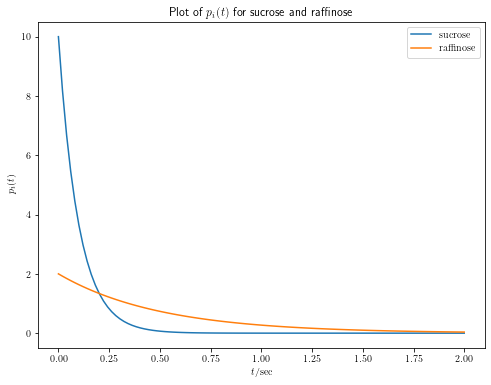

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def p_i(t, k_i):
    return k_i * np.exp(-k_i * t)

t_arr = np.linspace(0, 2, 100)

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
    })

ax.plot(t_arr, p_i(t_arr, k_i=10), label='$\\rm sucrose$')
ax.plot(t_arr, p_i(t_arr, k_i=2), label='$\\rm raffinose$')
ax.set_xlabel('$t/{\\rm sec}$')
ax.set_ylabel('$p_i(t)$')
ax.set_title('Plot of $p_i(t)$ for sucrose and raffinose')
plt.legend()

fig.set_size_inches(8, 6)
plt.savefig('4-a.jpg', dpi=1000, bbox_inches='tight')
plt.show()

b. 每个化学反应的累积概率分布$P(t)$是什么？$P(t)$定义为反应在时间$t$前发生的概率。同样，请在同一图上绘制两个累积概率分布，并标记$x$轴和$y$轴。

***Proof.*** 对(28)积分得
$$
P_i(t)=1-e^{-k_i t}\tag{29}
$$
使用如下的Python代码绘制两个累积概率分布如下。

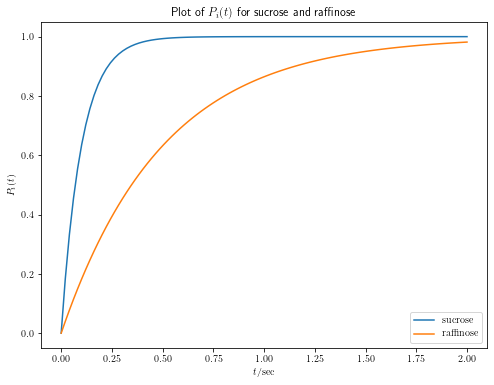

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def P_i(t, k_i):
    return 1 - np.exp(-k_i * t)

t_arr = np.linspace(0, 2, 100)

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
    })

ax.plot(t_arr, P_i(t_arr, k_i=10), label='$\\rm sucrose$')
ax.plot(t_arr, P_i(t_arr, k_i=2), label='$\\rm raffinose$')
ax.set_xlabel('$t/{\\rm sec}$')
ax.set_ylabel('$P_i(t)$')
ax.set_title('Plot of $P_i(t)$ for sucrose and raffinose')
plt.legend()

fig.set_size_inches(8, 6)
plt.savefig('4-b.jpg', dpi=1000, bbox_inches='tight')
plt.show()

c. 这两个反应在时间$t$之前都没有发生的概率是多少？

***Proof.*** 根据(29)，两个反应在时间$t$之前都没有发生的概率为
$$
P_{\rm none}(t)=\big(1-P_{\rm suc}(t)\big)\big(1-P_{\rm raff}(t)\big)=e^{-(k_{\rm suc}+k_{\rm raff})t}=e^{-12 t}\tag{30}
$$

d. 两个反应中第一个发生之前的概率密度函数是什么？如何解释这个结果。

***Proof.*** 对(30)进行归一化，得到概率密度函数为
$$
p(t)=\frac{1}{k_{\rm suc}+k_{\rm raff}}e^{-(k_{\rm suc}+k_{\rm raff})t}=\frac{1}{12}e^{-12 t}\tag{31}
$$
该结果说明两个反应中有一个发生的Waiting time服从参数为$k_{\rm suc}+k_{\rm raff}$的指数分布。

e. 前面的计算为模拟随机化学动力学提供了一种可能的方案。已知第一个反应发生的概率分布，接下来我们需要一种方法来估计哪个反应发生了。蔗糖在棉子糖之前水解的概率是多少？

***Proof.*** 估计哪个反应发生，可以使用如下算法：生成$[0,1]$上均匀分布的随机变量$r$，如果$r<\frac{k_{\rm suc}}{k_{\rm suc}+k_{\rm raff}}=0.8333$，则认为蔗糖在棉子糖之前水解，否则认为棉子糖在蔗糖之前水解。蔗糖在棉子糖之前水解的概率为$0.8333$。

## 5. 致病性进化 (Evolution of Virulence)

考虑一组方程来模拟致病性的进化，其中$𝑥$是未感染的宿主数量，$𝑦_1$是感染寄生虫1的宿主数量，$𝑦_2$是感染寄生虫2的宿主数量
$$
\begin{aligned}
\frac{dx}{dt}&=k-ux-x(\beta_1y_1+\beta_2y_2)\\
\frac{dy_1}{dt}&=y_1(\beta_1 x-u-v_1)\\
\frac{dy_2}{dt}&=y_2(\beta_2 x-u-v_2)
\end{aligned}\tag{32}
$$

a. 在平衡状态下，两种寄生虫中通常只有一种能存活。为什么？

***Proof.*** 在平衡状态下，有
$$
\begin{aligned}
\frac{dx}{dt}&=k-ux-x(\beta_1y_1+\beta_2y_2)=0\\
\frac{dy_1}{dt}&=y_1(\beta_1 x-u-v_1)=0\\
\frac{dy_2}{dt}&=y_2(\beta_2 x-u-v_2)=0
\end{aligned}\tag{33}
$$
通常$\beta_1 x-u-v_1$与$\beta_2 x-u-v_2$不同时为$0$，因此$y_1$与$y_2$不同时$>0$，也即两种寄生虫中通常只有一种能存活。

b. 首先考虑没有寄生虫2的情况下的动态。找到第一种平衡（$E_1$）的表达式，在该平衡下寄生虫1存活而寄生虫2不存活。

***Proof.*** 由(33)，当$y_2=0$时，第一种平衡$E_1$满足
$$
\begin{aligned}
x&=\frac{u+v_1}{\beta_1}\\
y_1&=\frac{k}{u+v_1}-\frac{u}{\beta_1}\\
y_2&=0
\end{aligned}\tag{34}
$$

c. 当寄生虫1的基本传染数（basic reproductive ratio）$R_1$大于1时，寄生虫1为地方病（非零）。$R_1$的表达式是什么？如何解释它？

***Proof.*** 寄生虫1的本底表达率$R_1$为
$$
R_1=\frac{\beta_1}{u+v_1}\tag{35}
$$
对$R_1$解释如下：在(32)中，$u$为宿主的自然死亡率，$v_i$为感染寄生虫$i$额外导致的死亡率，$\beta_i$为寄生虫$i$的传染率，$k$为宿主的出生率。$R_1$为寄生虫1的基本传染数，即1个寄生虫1的感染者在健康的宿主种群中平均增加了多少新的感染者。(35)式计算时用寄生虫1的传染率$\beta_1$除以自然死亡率$u$与寄生虫1造成的死亡率$v_1$之和，如果$R_1>1$，说明每个感染寄生虫1的宿主平均造成的二次感染数$>1$，故感染可以在宿主种群中传播。

d. 请证明当$R_2>R_1>1$时，寄生虫2可以入侵平衡1，而寄生虫1不能入侵平衡2（当寄生虫2以非零数量存在时）。

***Proof.*** 当$R_2>R_1>1$，即
$$
\frac{\beta_2}{u+v_2}>\frac{\beta_1}{u+v_1}>1\tag{36}
$$
时，考虑在平衡$E_1$下，感染寄生虫2宿主数量的变化率
$$
\begin{aligned}
\frac{dy_2}{dt}&=y_2(\beta_2 x-u-v_2)\\
&=y_2\Big(\beta_2\frac{u+v_1}{\beta_1}-u-v_2\Big)\\
&=y_2\beta_2\Big(\frac{u+v_1}{\beta_1}-\frac{u+v_2}{\beta_2}\Big)\\
&>0
\end{aligned}\tag{37}
$$
因此寄生虫2可以入侵平衡1。反之，考虑在平衡$E_2$下，感染寄生虫1宿主数量的变化率
$$
\begin{aligned}
\frac{dy_1}{dt}&=y_1(\beta_1 x-u-v_1)\\
&=y_1\Big(\beta_1\frac{u+v_2}{\beta_2}-u-v_1\Big)\\
&=y_1\beta_1\Big(\frac{u+v_2}{\beta_2}-\frac{u+v_1}{\beta_1}\Big)\\
&<0
\end{aligned}\tag{38}
$$
因此寄生虫1不能入侵平衡2。

e. 当$\beta_1=\alpha v_1$，并且$\beta_2=\alpha v_2$时，其中$\alpha$是常数，致病性$v_i$如何随着时间演化？

***Proof.*** 当$\beta_1=\alpha v_1$，并且$\beta_2=\alpha v_2$时，(32)式变为
$$
\begin{aligned}
\frac{dx}{dt}&=k-ux-x(\alpha v_1y_1+\alpha v_2y_2)\\
\frac{dy_1}{dt}&=y_1(\alpha v_1 x-u-v_1)\\
\frac{dy_2}{dt}&=y_2(\alpha v_2 x-u-v_2)
\end{aligned}\tag{39}
$$
而基本传染数变为
$$
\begin{aligned}
R_1&=\frac{\alpha v_1}{u+v_1}\\
R_2&=\frac{\alpha v_2}{u+v_2}
\end{aligned}\tag{40}
$$
$R_i$随$v_i$单调递增，因此在寄生虫1与寄生虫2竞争的选择压力下，致病性$v_1$，$v_2$会单调递增。但由于$v_i\rightarrow \infty$, $R_i\rightarrow \alpha$，因此$v_1,v_2$增长的选择压力会越来越小，增长速率越来越慢。